# Evaluation Project - 5

Census Income Project Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year. Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv("census_income.csv")
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

In [3]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64



No null values present

In [4]:
(df.loc[:,:]==" ").sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
(df.loc[:,:]==0).sum()

Age                   0
Workclass             0
Fnlwgt                0
Education             0
Education_num         0
Marital_status        0
Occupation            0
Relationship          0
Race                  0
Sex                   0
Capital_gain      29849
Capital_loss      31041
Hours_per_week        0
Native_country        0
Income                0
dtype: int64

In [6]:
df["Workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [7]:
(df.loc[:,:]== " ?").sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64


    
Missing values present in workclass,occupation and native country.

In [8]:
df["Education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [9]:
df["Education_num"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [10]:
df["Marital_status"].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [11]:
df["Occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [12]:
df["Relationship"].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [13]:
df["Race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [14]:
df["Sex"].unique()

array([' Male', ' Female'], dtype=object)

In [15]:
df["Native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [16]:
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [17]:
df["Workclass"]=df["Workclass"].replace(" ?",np.nan)  #replacing ? with nan
df["Workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [18]:
df["Occupation"]=df["Occupation"].replace(" ?",np.nan)  #replacing ? with nan
df["Occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [19]:
df["Native_country"]=df["Native_country"].replace(" ?",np.nan)  #replacing ? with nan
df["Native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [20]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [21]:
import statistics as stats
df["Workclass"]=df["Workclass"].fillna(stats.mode(df["Workclass"]))
df["Native_country"]=df["Native_country"].fillna(stats.mode(df["Native_country"]))
df["Occupation"]=df["Occupation"].fillna(stats.mode(df["Occupation"]))
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [22]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# EDA

Text(0.5, 1.0, 'Sex')

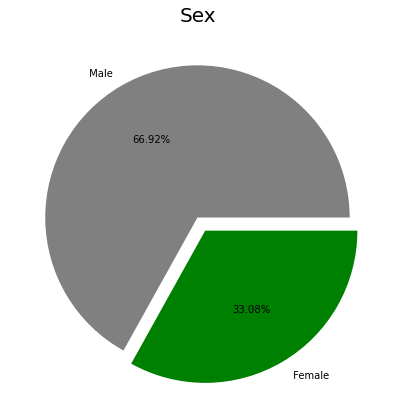

In [23]:
count=df["Sex"].value_counts()
explode = [0, 0.1]
plt.figure(figsize=(7,7))
plt.pie(data=count,x=count.values,labels=count.index,colors=["grey","green"],autopct="%0.2f%%",explode=explode)
plt.title("Sex",size=20)


    
1. There are higher number of males compared to females.

Text(0.5, 1.0, 'Income')

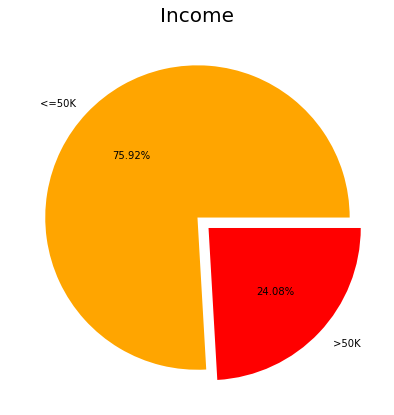

In [24]:
count=df["Income"].value_counts()
explode = [0, 0.1]
plt.figure(figsize=(7,7))
plt.pie(data=count,x=count.values,labels=count.index,colors=["orange","red"],autopct="%0.2f%%",explode=explode)
plt.title("Income",size=20)

Observation:
    
    Most of the population has monthly income less than or equal to 50K.

Text(0.5, 1.0, 'Income less than or equal to 50K')

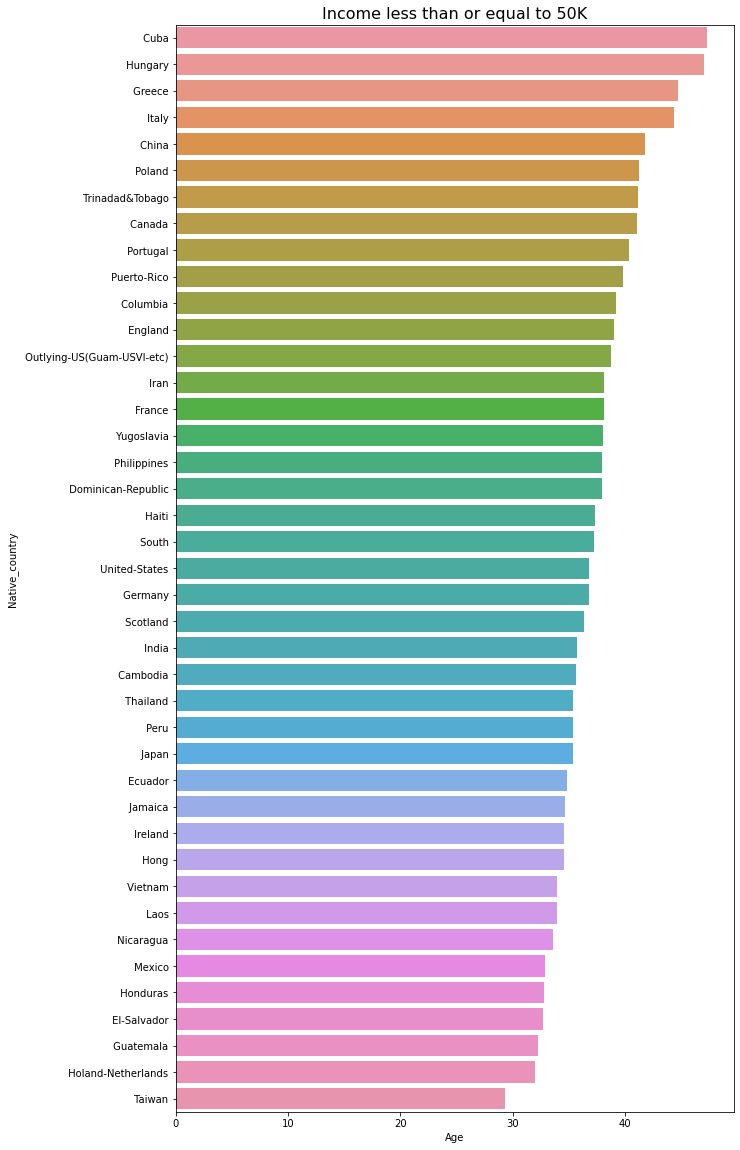

In [25]:
df_org = df.loc[df["Income"] == " <=50K"]
df_r = df_org.groupby(["Native_country"])[["Age"]].mean().sort_values(by = "Age", ascending = False)
plt.figure(figsize = (10, 20))
sns.barplot(data = df_r, x = "Age", y = df_r.index)
plt.title("Income less than or equal to 50K", size = 16)


    
1. The mean age of an individual who earns less than 50k is highest in individuals from Cuba. 


2. The mean age of an individual who earns less than 50k is least in individuals from Taiwan. 

Text(0.5, 1.0, 'Income more than to 50K')

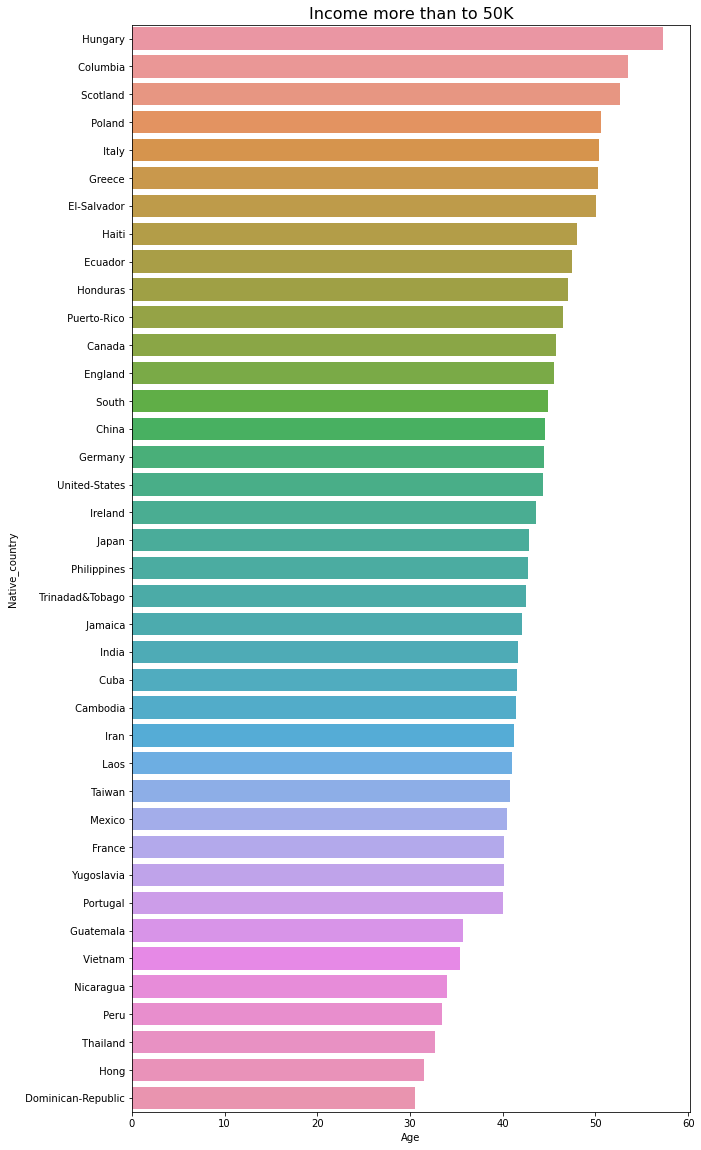

In [26]:
df_org = df.loc[df["Income"] == " >50K"]
df_r = df_org.groupby(["Native_country"])[["Age"]].mean().sort_values(by = "Age", ascending = False)
plt.figure(figsize = (10, 20))
sns.barplot(data = df_r, x = "Age", y = df_r.index)
plt.title("Income more than to 50K", size = 16)


    
1. The mean age of an individual who earns more than 50k is highest in individuals from Hungary.


2. The mean age of an individual who earns more than 50k is highest in individuals from Domibican-replublic.

Text(0.5, 1.0, 'Income less than or equal to 50K')

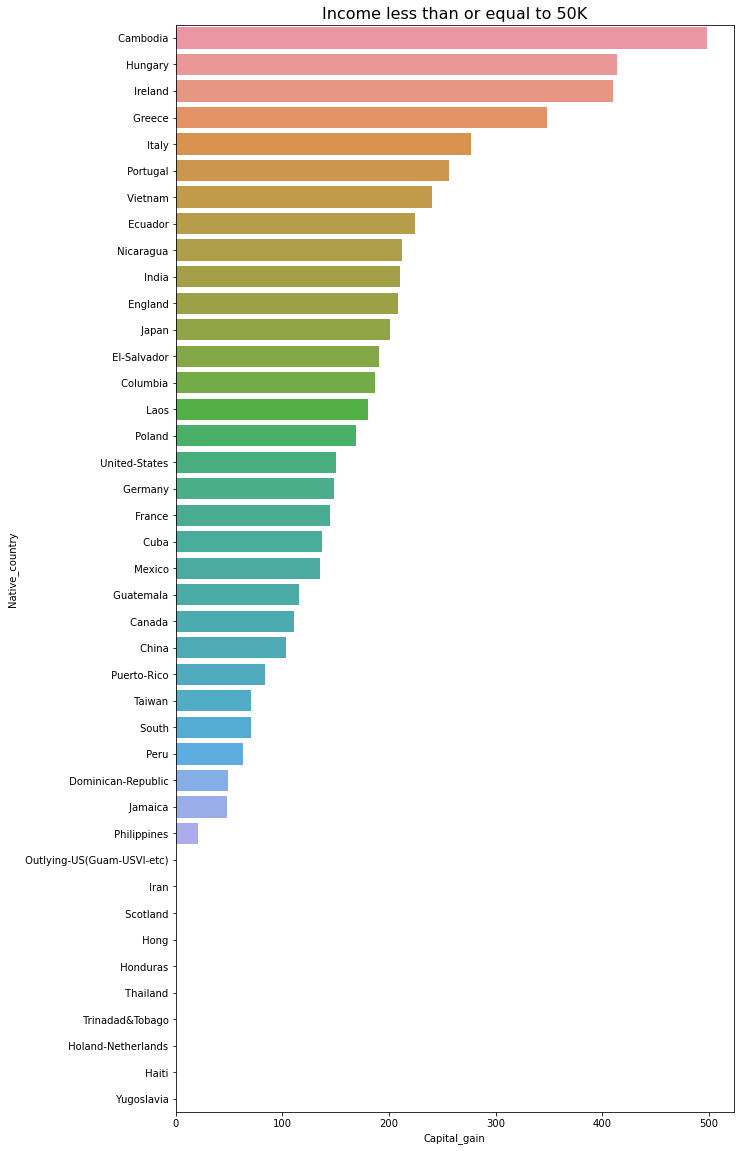

In [27]:
df_org = df.loc[df["Income"] == " <=50K"]
df_r = df_org.groupby(["Native_country"])[["Capital_gain"]].mean().sort_values(by = "Capital_gain", ascending = False)
plt.figure(figsize = (10, 20))
sns.barplot(data = df_r, x = "Capital_gain", y = df_r.index)
plt.title("Income less than or equal to 50K", size = 16)


    
1. Captial gains have been the highest with individuals from Cambodia who make less than 50k.


2. Captial gains have been the least with individuals from Philippines who make less than 50k.


3. Captial gains have been zero with individuals from outlying US,iran,scotland,Hong,Honduras,Tailand,Tpbago,Haiti,Yugoslavia who make less than 50k.

Text(0.5, 1.0, 'Income less than or equal to 50K')

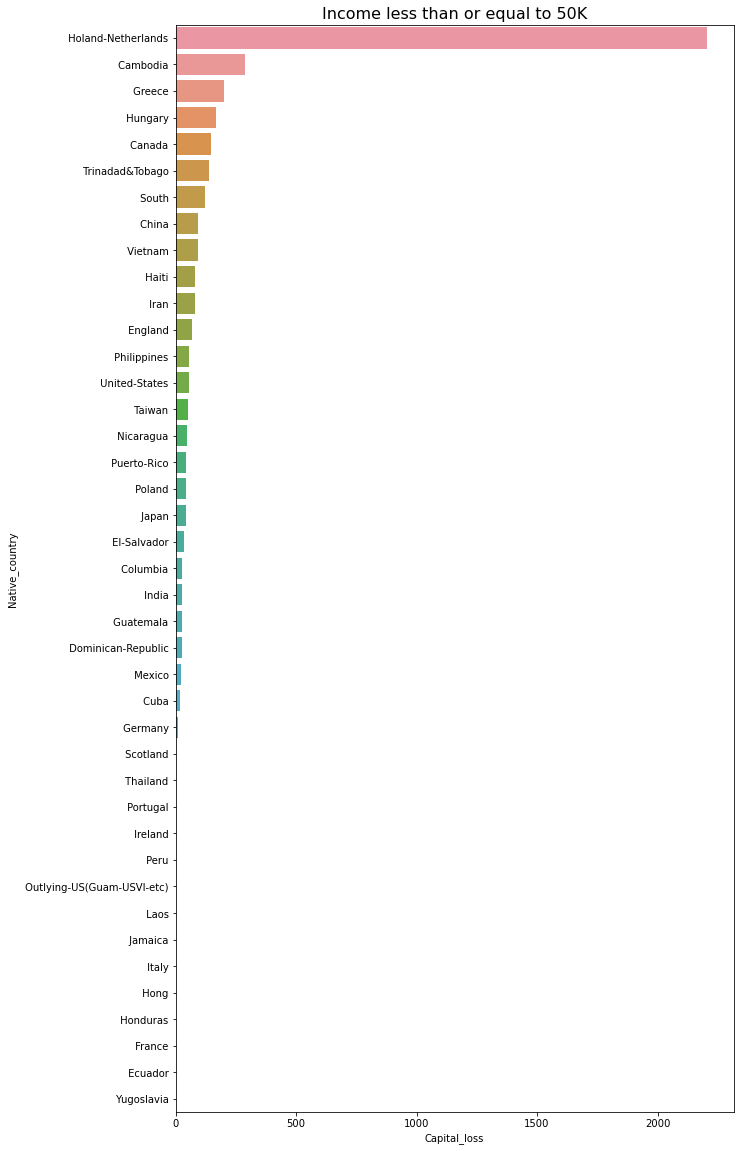

In [28]:
df_org = df.loc[df["Income"] == " <=50K"]
df_r = df_org.groupby(["Native_country"])[["Capital_loss"]].mean().sort_values(by = "Capital_loss", ascending = False)
plt.figure(figsize = (10, 20))
sns.barplot(data = df_r, x = "Capital_loss", y = df_r.index)
plt.title("Income less than or equal to 50K", size = 16)


    
1. Capital losses have been the highest with individuals from Holand-Netherlands who make less than 50K. 


2. Capital losses have been the least with individuals from Cuba who make less than 50K.


3. Most individuals from contries do not have any capatial losses. 

Text(0.5, 1.0, 'Income more than to 50K')

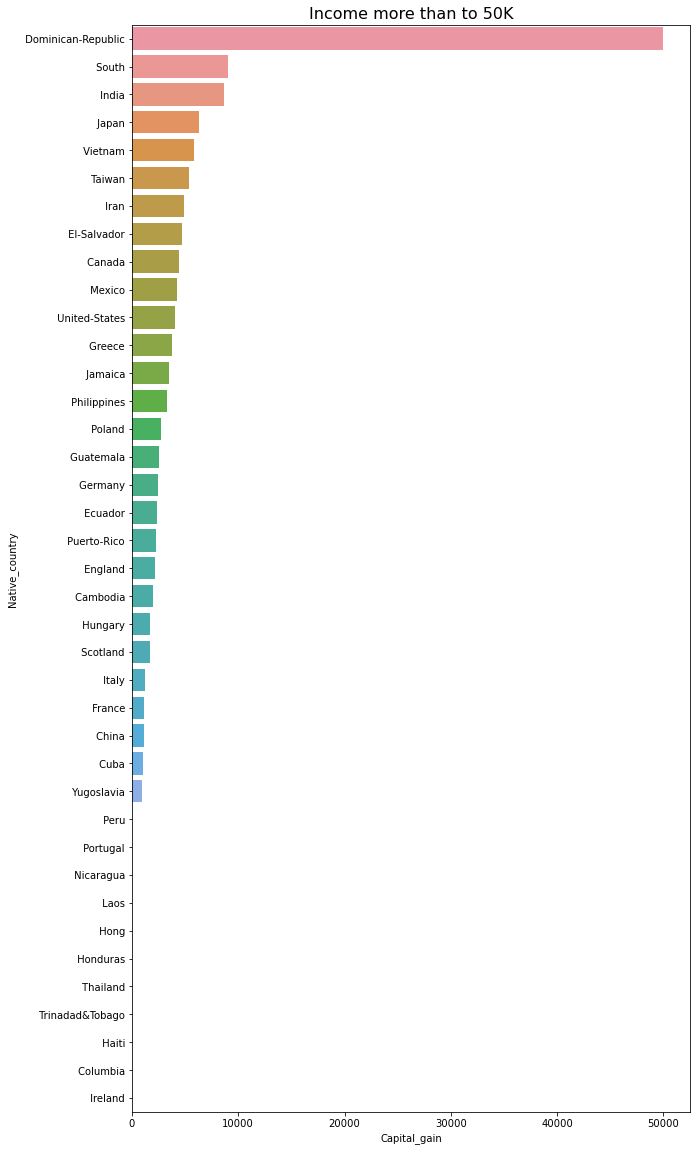

In [29]:
df_org = df.loc[df["Income"] == " >50K"]
df_r = df_org.groupby(["Native_country"])[["Capital_gain"]].mean().sort_values(by = "Capital_gain", ascending = False)
plt.figure(figsize = (10, 20))
sns.barplot(data = df_r, x = "Capital_gain", y = df_r.index)
plt.title("Income more than to 50K", size = 16)


    
1. Captial gains have been the highest with individuals from Dominican- Replublic  who make more than 50k.


2. Captial gains have been the least with individuals from Yugoslavia who make more than 50k.


3. Captial gains have been zero with individuals from Peru,Portugal,Hong,Nicaraguna,Honduras,Laos,Tailand,Tpbago,Haiti,ireland who make more than 50k.

Text(0.5, 1.0, 'Income more than to 50K')

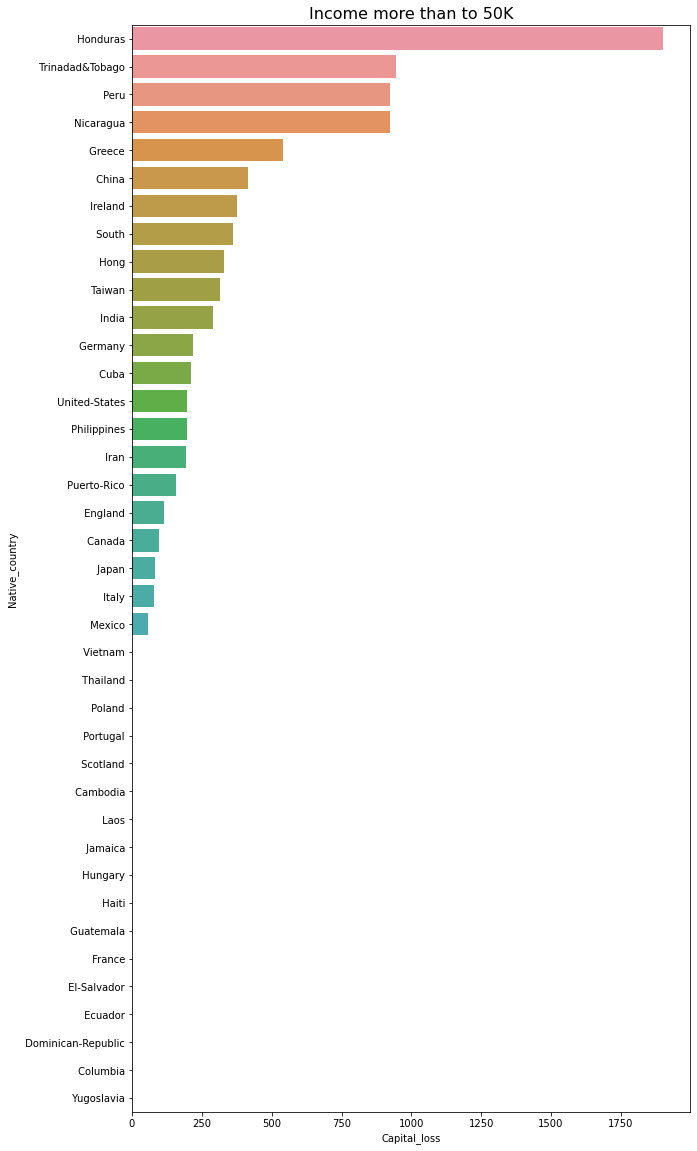

In [30]:
df_org = df.loc[df["Income"] == " >50K"]
df_r = df_org.groupby(["Native_country"])[["Capital_loss"]].mean().sort_values(by = "Capital_loss", ascending = False)
plt.figure(figsize = (10, 20))
sns.barplot(data = df_r, x = "Capital_loss", y = df_r.index)
plt.title("Income more than to 50K", size = 16)


    
1. Capital losses have been the highest with individuals from Honduras who make more than 50K.


2. Capital losses have been the least with individuals from Mexico who make more than 50K.


3. Most individuals from contries do not have any capatial losses.

Text(0.5, 1.0, 'Race')

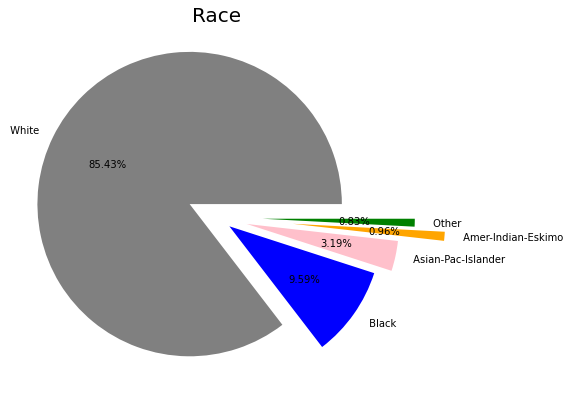

In [31]:
count=df["Race"].value_counts()
explode = [0.2, 0.1,0.2,0.5,0.3]
plt.figure(figsize=(7,7))
plt.pie(data=count,x=count.values,labels=count.index,colors=["grey","blue","pink","orange","green"],autopct="%0.2f%%",explode=explode)
plt.title("Race",size=20)


    
1. White has the highest presence in the population. 


2. Amer-Indian-Eskimo and other account to less than 2% of the population.

<AxesSubplot:xlabel='count', ylabel='Relationship'>

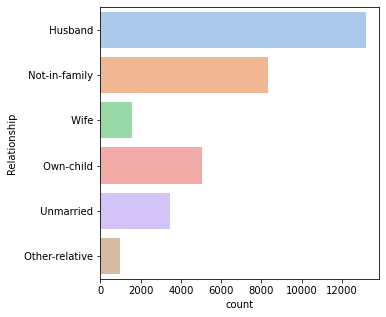

In [32]:
plt.figure(figsize=(5,5))
sns.countplot(y="Relationship",data=df,palette="pastel")


    
1. Husband have the highest count in the population.


2. Other-relatives have the least presence in the population.

Text(0.5, 1.0, 'Income more than to 50K')

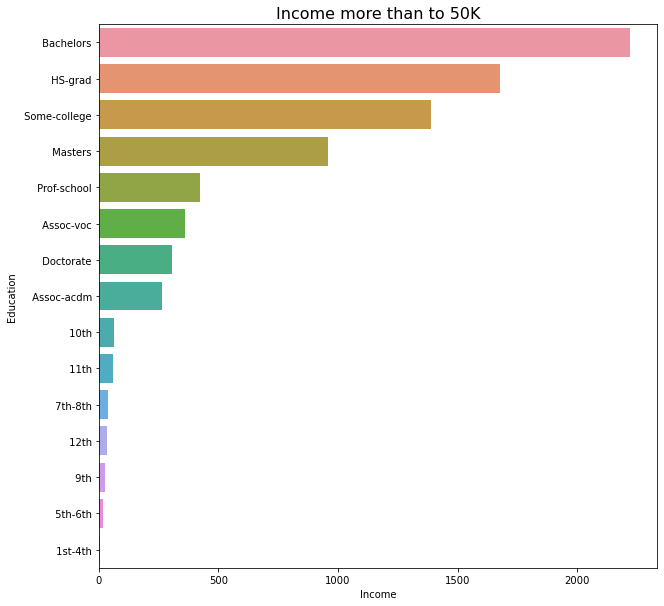

In [33]:
df_org = df.loc[df["Income"] == " >50K"]
df_r = df_org.groupby(["Education"])[["Income"]].count().sort_values(by = "Income", ascending = False)
plt.figure(figsize = (10, 10))
sns.barplot(data = df_r, x = "Income", y = df_r.index)
plt.title("Income more than to 50K", size = 16)


    
1. A large number of individuals with a bachelor degree earn over 50k.


2. A small number of individuals with a qualification of 5-6th grade earn over 50k.


3. Individuals with qualifications of 1-4th grade do not earn over 50k.

Text(0.5, 1.0, 'Income less than or equal to 50K')

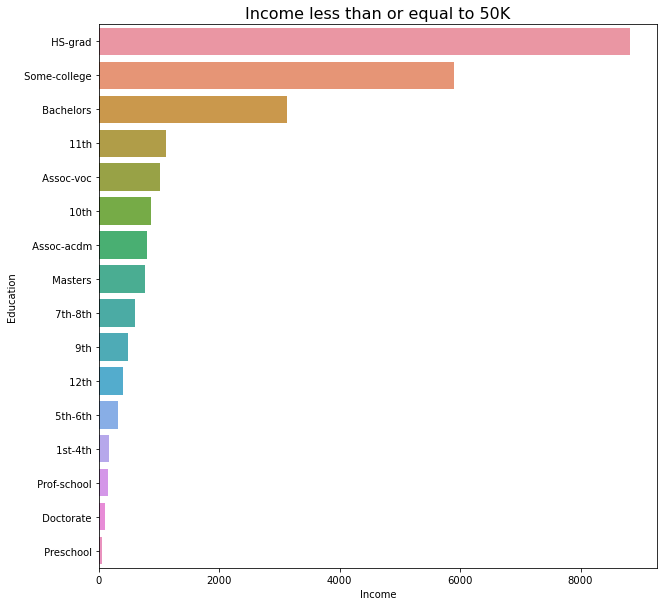

In [34]:
df_org = df.loc[df["Income"] == " <=50K"]
df_r = df_org.groupby(["Education"])[["Income"]].count().sort_values(by = "Income", ascending = False)
plt.figure(figsize = (10, 10))
sns.barplot(data = df_r, x = "Income", y = df_r.index)
plt.title("Income less than or equal to 50K", size = 16)


    
1. Most individuals with high school graduation earn less than 50K.


2. A few individuals with preschool earn less than 50K.

Text(0.5, 1.0, 'Income more than to 50K')

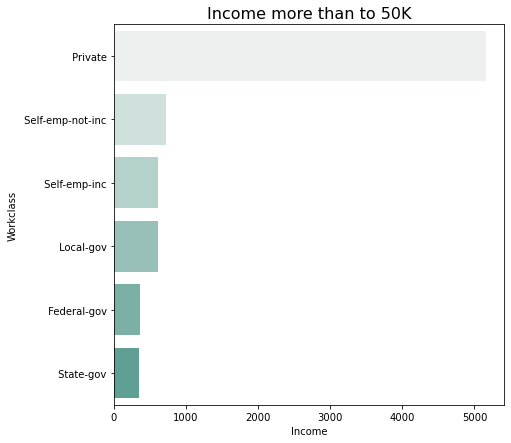

In [35]:
df_org = df.loc[df["Income"] == " >50K"]
df_r = df_org.groupby(["Workclass"])[["Income"]].count().sort_values(by = "Income", ascending = False)
plt.figure(figsize = (7, 7))
sns.barplot(data = df_r, x = "Income", y = df_r.index,palette="light:#5A9")
plt.title("Income more than to 50K", size = 16)

Observations:
    
1. Most individuals working in private make more than 50k.


2. Lesser number of individuals working in Federal-gov and State-gov make more than 50K.

Text(0.5, 1.0, 'Income less than or equal to 50K')

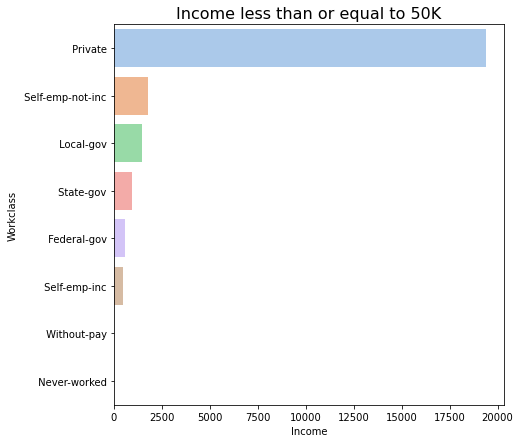

In [36]:
df_org = df.loc[df["Income"] == " <=50K"]
df_r = df_org.groupby(["Workclass"])[["Income"]].count().sort_values(by = "Income", ascending = False)
plt.figure(figsize = (7, 7))
sns.barplot(data = df_r, x = "Income", y = df_r.index,palette="pastel")
plt.title("Income less than or equal to 50K", size = 16)


    
1. Higher number of individuals working in private make less than 50k.


2. lesser number of individuals working in self emp inc make less than 50k.

<AxesSubplot:xlabel='count', ylabel='Relationship'>

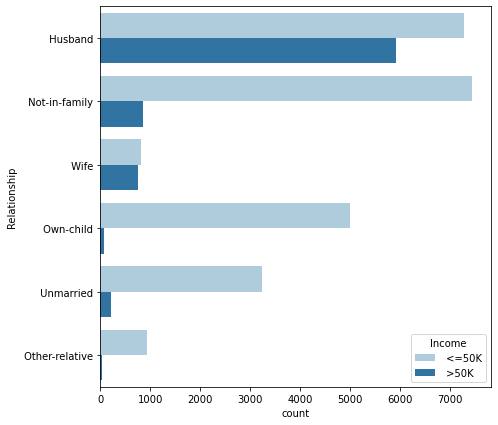

In [37]:
plt.figure(figsize=(7,7))
sns.countplot(y="Relationship",hue="Income",data=df,palette="Paired")


    
1. Most husbands make income less than 50k than making more than 50k.


2. Wife have a close ratio with income. 


3. Own child and other relatives mostly make less than 50k.


<AxesSubplot:xlabel='count', ylabel='Marital_status'>

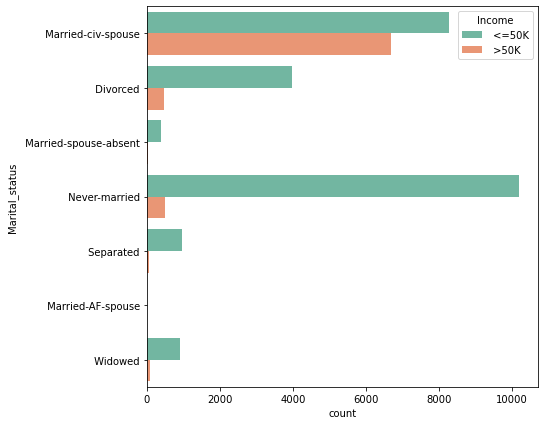

In [38]:
plt.figure(figsize=(7,7))
sns.countplot(y="Marital_status",hue="Income",data=df,palette="Set2")


    
1. Most never married make less than 50k.


2. Higher number of married civ spouse make less than 50k.


3. Married spouse absent make only less than 50k.


4. Married AF spouse do not make any money.

In [39]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# Label Encoder

In [40]:
import sklearn 
from sklearn.preprocessing import LabelEncoder 
lencode=LabelEncoder()

In [41]:
df["Sex"]=lencode.fit_transform(df["Sex"])
df["Workclass"]=lencode.fit_transform(df["Workclass"])
df["Education"]=lencode.fit_transform(df["Education"])
df["Marital_status"]=lencode.fit_transform(df["Marital_status"])
df["Occupation"]=lencode.fit_transform(df["Occupation"])
df["Relationship"]=lencode.fit_transform(df["Relationship"])
df["Race"]=lencode.fit_transform(df["Race"])
df["Native_country"]=lencode.fit_transform(df["Native_country"])
df["Income"]=lencode.fit_transform(df["Income"])
df

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          5   83311          9             13               2   
1       38          3  215646         11              9               0   
2       53          3  234721          1              7               2   
3       28          3  338409          9             13               2   
4       37          3  284582         12             14               2   
...    ...        ...     ...        ...            ...             ...   
32555   27          3  257302          7             12               2   
32556   40          3  154374         11              9               2   
32557   58          3  151910         11              9               6   
32558   22          3  201490         11              9               4   
32559   52          4  287927         11              9               2   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0               3             0     4    1             0             0   
1               5             1     4    1             0             0   
2               5             0     2    1             0             0   
3               9             5     2    0             0             0   
4               3             5     4    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32555          12             5     4    0             0             0   
32556           6             0     4    1             0             0   
32557           0             4     4    0             0             0   
32558           0             3     4    1             0             0   
32559           3             5     4    0         15024             0   

       Hours_per_week  Native_country  Income  
0                  13              38       0  
1                  40              38       0  
2                  40              38       0  
3                  40               4       0  
4                  40              38       0  
...               ...             ...     ...  
32555              38              38       0  
32556              40              38       1  
32557              40              38       0  
32558              20              38       0  
32559              40              38       1  

[32560 rows x 15 columns]

In [42]:
df.corr()

Age  Workclass    Fnlwgt  Education  Education_num  \
Age             1.000000   0.040506 -0.076646  -0.010508       0.036527   
Workclass       0.040506   1.000000 -0.024255   0.004901       0.003445   
Fnlwgt         -0.076646  -0.024255  1.000000  -0.028156      -0.043159   
Education      -0.010508   0.004901 -0.028156   1.000000       0.359172   
Education_num   0.036527   0.003445 -0.043159   0.359172       1.000000   
Marital_status -0.266292  -0.020545  0.028184  -0.038398      -0.069338   
Occupation      0.001740   0.007236  0.000138  -0.041297       0.071012   
Relationship   -0.263698  -0.057931  0.008922  -0.010879      -0.094145   
Race            0.028718   0.048323 -0.021278   0.014135       0.031825   
Sex             0.088832   0.071535  0.026882  -0.027349       0.012256   
Capital_gain    0.077674   0.031496  0.000437   0.030047       0.122627   
Capital_loss    0.057775   0.002662 -0.010259   0.016744       0.079932   
Hours_per_week  0.068756   0.042206 -0.018770   0.055510       0.148127   
Native_country -0.000271  -0.001646 -0.063279   0.076062       0.088887   
Income          0.234039   0.002739 -0.009481   0.079311       0.335182   

                Marital_status  Occupation  Relationship      Race       Sex  \
Age                  -0.266292    0.001740     -0.263698  0.028718  0.088832   
Workclass            -0.020545    0.007236     -0.057931  0.048323  0.071535   
Fnlwgt                0.028184    0.000138      0.008922 -0.021278  0.026882   
Education            -0.038398   -0.041297     -0.010879  0.014135 -0.027349   
Education_num        -0.069338    0.071012     -0.094145  0.031825  0.012256   
Marital_status        1.000000    0.035008      0.185461 -0.068025 -0.129337   
Occupation            0.035008    1.000000     -0.037465 -0.004821  0.047497   
Relationship          0.185461   -0.037465      1.000000 -0.116052 -0.582453   
Race                 -0.068025   -0.004821     -0.116052  1.000000  0.087197   
Sex                  -0.129337    0.047497     -0.582453  0.087197  1.000000   
Capital_gain         -0.043398    0.018028     -0.057918  0.011143  0.048477   
Capital_loss         -0.034182    0.009670     -0.061064  0.018902  0.045572   
Hours_per_week       -0.190521   -0.012881     -0.248975  0.041910  0.229312   
Native_country       -0.021285   -0.002205     -0.010710  0.116526  0.002055   
Income               -0.199295    0.034599     -0.250924  0.071853  0.215995   

                Capital_gain  Capital_loss  Hours_per_week  Native_country  \
Age                 0.077674      0.057775        0.068756       -0.000271   
Workclass           0.031496      0.002662        0.042206       -0.001646   
Fnlwgt              0.000437     -0.010259       -0.018770       -0.063279   
Education           0.030047      0.016744        0.055510        0.076062   
Education_num       0.122627      0.079932        0.148127        0.088887   
Marital_status     -0.043398     -0.034182       -0.190521       -0.021285   
Occupation          0.018028      0.009670       -0.012881       -0.002205   
Relationship       -0.057918     -0.061064       -0.248975       -0.010710   
Race                0.011143      0.018902        0.041910        0.116526   
Sex                 0.048477      0.045572        0.229312        0.002055   
Capital_gain        1.000000     -0.031614        0.078409        0.008818   
Capital_loss       -0.031614      1.000000        0.054256        0.009402   
Hours_per_week      0.078409      0.054256        1.000000        0.006592   
Native_country      0.008818      0.009402        0.006592        1.000000   
Income              0.223333      0.150523        0.229690        0.023063   

                  Income  
Age             0.234039  
Workclass       0.002739  
Fnlwgt         -0.009481  
Education       0.079311  
Education_num   0.335182  
Marital_status -0.199295  
Occupation      0.034599  
Relationship   -0.250924  
Race            0.071853  
Sex             0.21

<AxesSubplot:>

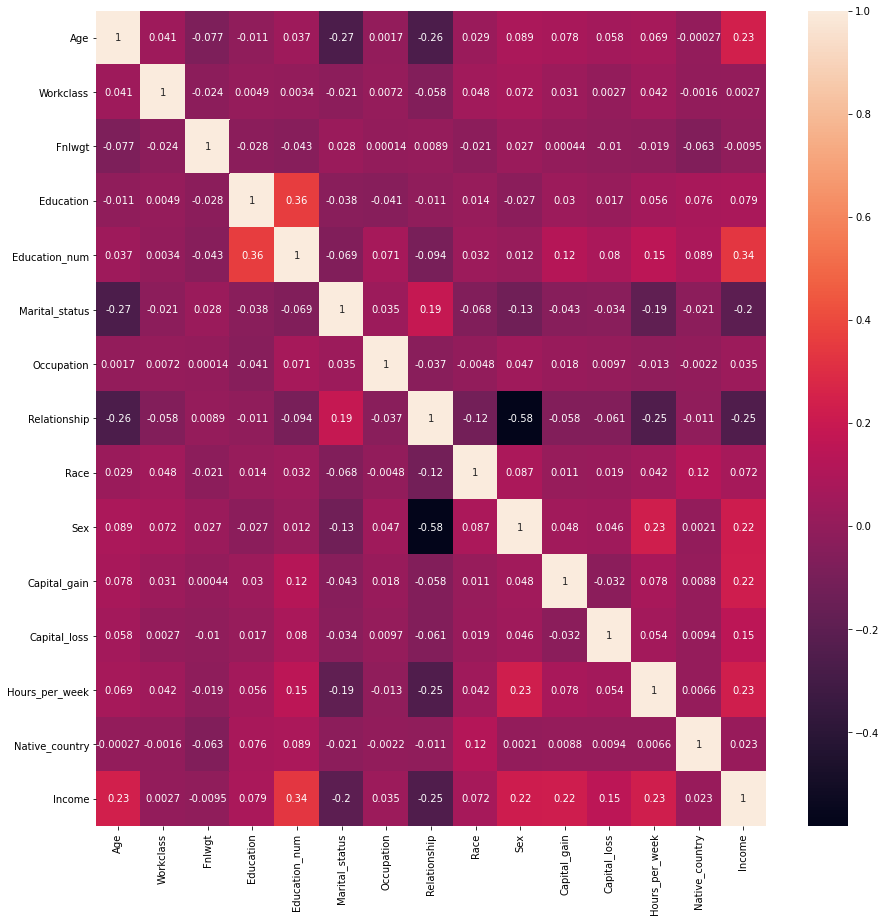

In [43]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)


    
1. Fnlwgt and workclass have correlation close to zero with income.


2. Education_num is highly correlation with income.

In [44]:
round(df.describe(),3)

Age  Workclass       Fnlwgt  Education  Education_num  \
count  32560.000  32560.000    32560.000  32560.000      32560.000   
mean      38.582      3.094   189781.814     10.298         10.081   
std       13.641      1.107   105549.765      3.870          2.573   
min       17.000      0.000    12285.000      0.000          1.000   
25%       28.000      3.000   117831.500      9.000          9.000   
50%       37.000      3.000   178363.000     11.000         10.000   
75%       48.000      3.000   237054.500     12.000         12.000   
max       90.000      7.000  1484705.000     15.000         16.000   

       Marital_status  Occupation  Relationship       Race        Sex  \
count       32560.000   32560.000     32560.000  32560.000  32560.000   
mean            2.612       6.139         1.446      3.666      0.669   
std             1.506       3.973         1.607      0.849      0.471   
min             0.000       0.000         0.000      0.000      0.000   
25%             2.000       3.000         0.000      4.000      0.000   
50%             2.000       6.000         1.000      4.000      1.000   
75%             4.000       9.000         3.000      4.000      1.000   
max             6.000      13.000         5.000      4.000      1.000   

       Capital_gain  Capital_loss  Hours_per_week  Native_country     Income  
count     32560.000     32560.000       32560.000       32560.000  32560.000  
mean       1077.615        87.307          40.437          36.417      0.241  
std        7385.403       402.966          12.348           6.056      0.428  
min           0.000         0.000           1.000           0.000      0.000  
25%           0.000         0.000          40.000          38.000      0.000  
50%           0.000         0.000          40.000          38.000      0.000  
75%           0.000         0.000          45.000          38.000      0.000  
max       99999.000      4356.000          99.000          40.000      1.000


    
1. Fnlwgt has mean way away from zero. Hence the data is not normally distributed.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


Observations:
    
No null values.

In [46]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

# Checking for outliers and skewness 

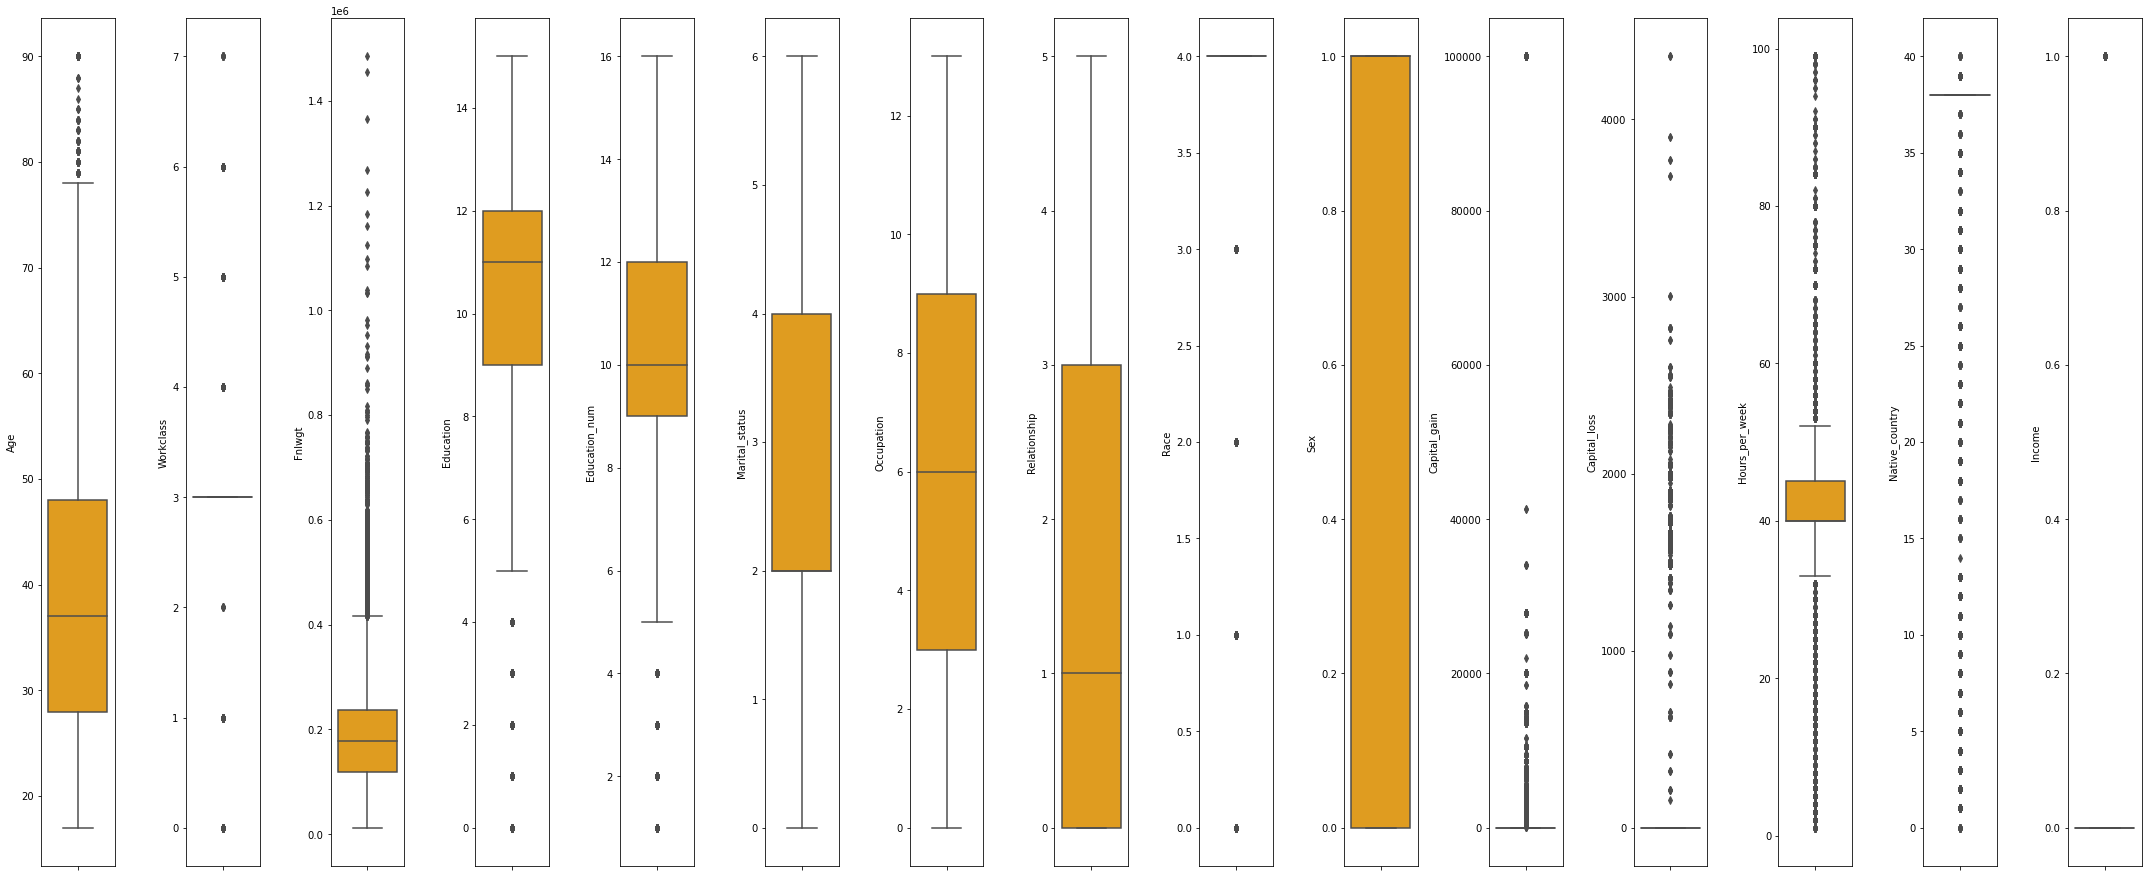

In [47]:
collist=df.columns.values
ncol=20 #no.of columns and rows to display the graphs i.e max col and max row
nrows=15
plt.figure(figsize=(2*ncol,9*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df[collist[i]],color="orange",orient="v")
    plt.tight_layout()

Observations:
    
1. features have outliers present. 

In [48]:
df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64


    
1. Capital gains and capital losses have huge amount of skewness present.

# Data Cleaning 

In [49]:
df=df.drop(["Fnlwgt","Workclass"],axis=1)   # have low correlation with the target

In [50]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def c_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return(vif)

In [51]:
c_vif(x)

variables        VIF
0              Age   8.696823
1        Education   9.216766
2    Education_num  18.656522
3   Marital_status   4.020048
4       Occupation   3.378563
5     Relationship   2.630808
6             Race  17.469185
7              Sex   4.414031
8     Capital_gain   1.044907
9     Capital_loss   1.061555
10  Hours_per_week  11.820181
11  Native_country  28.125632

In [52]:
df["diff"]=(df["Native_country"]-df["Education_num"]-df["Race"])

In [53]:
df=df.drop(["Native_country","Education_num","Race"],axis=1)

In [54]:
x=df.drop(["Income"],axis=1)
y=df["Income"]
c_vif(x)

variables        VIF
0             Age   7.750301
1       Education   7.001163
2  Marital_status   3.848726
3      Occupation   3.257269
4    Relationship   2.547542
5             Sex   4.270222
6    Capital_gain   1.037385
7    Capital_loss   1.057410
8  Hours_per_week  10.153999
9            diff  10.616490

Observations:

1. All vif values are with in 10.

In [55]:
import scipy 
from scipy.stats import zscore 
z=np.abs(zscore(df))  #removes outliers
z.shape

(32560, 11)

In [56]:
threshold=3
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(32560, 11)
(29381, 11)


In [57]:
#data loss

(32560-29381)/32560*100

9.763513513513514

In [58]:
x=df_new.drop(["Income"],axis=1)
y=df_new["Income"]

In [59]:
print(x.shape)
print(y.shape)

(29381, 10)
(29381,)


In [60]:
from sklearn.preprocessing import power_transform 
x=power_transform(x,method="yeo-johnson") #removing skewness 

# Preprocessing

In [61]:
import sklearn 
from sklearn.preprocessing import MinMaxScaler 

In [62]:
ms=MinMaxScaler()
x=ms.fit_transform(x)
x

array([[0.67071942, 0.47547404, 0.34921632, ..., 0.        , 0.08048913,
        0.25560479],
       [0.4862991 , 0.63526475, 0.        , ..., 0.        , 0.41516062,
        0.39721493],
       [0.71112563, 0.02658464, 0.34921632, ..., 0.        , 0.41516062,
        0.57818752],
       ...,
       [0.77451549, 0.63526475, 1.        , ..., 0.        , 0.41516062,
        0.39721493],
       [0.1472254 , 0.63526475, 0.67967262, ..., 0.        , 0.1565718 ,
        0.39721493],
       [0.69786811, 0.63526475, 0.34921632, ..., 0.        , 0.41516062,
        0.39721493]])

# SMOTE

In [63]:
y.value_counts()

0    22879
1     6502
Name: Income, dtype: int64

In [64]:
from imblearn.over_sampling import SMOTE 
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [65]:
trainy.value_counts()

0    22879
1    22879
Name: Income, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,confusion_matrix

In [68]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    
    pred_test_lr=lr.predict(x_test)
    
    print("At random state=",i,'testing accuracy =',accuracy_score(y_test,pred_test_lr))
    print("\n")

At random state= 0 testing accuracy = 0.7589597902097902


At random state= 1 testing accuracy = 0.7722902097902098


At random state= 2 testing accuracy = 0.7721809440559441


At random state= 3 testing accuracy = 0.754916958041958


At random state= 4 testing accuracy = 0.7642045454545454


At random state= 5 testing accuracy = 0.765625


At random state= 6 testing accuracy = 0.767263986013986


At random state= 7 testing accuracy = 0.7690122377622378


At random state= 8 testing accuracy = 0.7669361888111889


At random state= 9 testing accuracy = 0.7643138111888111


At random state= 10 testing accuracy = 0.7602709790209791


At random state= 11 testing accuracy = 0.7638767482517482


At random state= 12 testing accuracy = 0.7622377622377622


At random state= 13 testing accuracy = 0.7699956293706294


At random state= 14 testing accuracy = 0.7663898601398601


At random state= 15 testing accuracy = 0.7534965034965035


At random state= 16 testing accuracy = 0.7625655594405595


At

In [69]:
lr=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.2,random_state=90)
lr.fit(x_train,y_train)
    
pred_test_lr=lr.predict(x_test)
    
print('testing accuracy =',accuracy_score(y_test,pred_test_lr))

testing accuracy = 0.7633304195804196


In [70]:
from sklearn.model_selection import cross_val_score 
for i in range(2,11):
    rf_cv=cross_val_score(lr,trainx,trainy,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)


Score = 76.57240263997552 at cv = 2
Score = 76.55492693000244 at cv = 3
Score = 76.52433923603277 at cv = 4
Score = 76.53308075925823 at cv = 5
Score = 76.50030454952088 at cv = 6
Score = 76.51558931106864 at cv = 7
Score = 76.51341238321044 at cv = 8
Score = 76.51342768700944 at cv = 9
Score = 76.51559813137683 at cv = 10


In [71]:
rf_cv=cross_val_score(lr,trainx,trainy,cv=6)
rfs=rf_cv.mean()
print("CV Score =",rfs*100)
print("Accuracy_score =",accuracy_score(y_test,pred_test_lr)*100)

CV Score = 76.50030454952088
Accuracy_score = 76.33304195804196


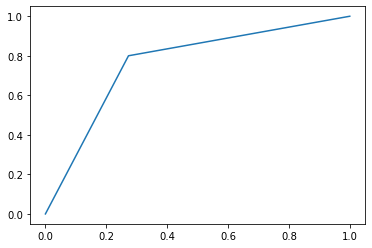

In [72]:
from sklearn import metrics
fpr,tpr,_ = metrics.roc_curve(y_test,pred_test_lr)
metrics.roc_auc_score(y_test,pred_test_lr)
plt.plot(fpr,tpr)

In [73]:
 x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.2)

# DecisionTree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [75]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

pred_test_dt=dt.predict(x_test)
acc_test=accuracy_score(pred_test_dt,y_test)

print("acc_test =",acc_test)

acc_test = 0.8576267482517482


In [76]:
for i in range(2,11):
    rf_cv=cross_val_score(dt,trainx,trainy,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)


Score = 83.56134446435597 at cv = 2
Score = 84.1536581004299 at cv = 3
Score = 84.76783777678743 at cv = 4
Score = 85.03007452469943 at cv = 5
Score = 85.10672953174884 at cv = 6
Score = 85.24416831217503 at cv = 7
Score = 85.38631655981716 at cv = 8
Score = 85.4280969475727 at cv = 9
Score = 85.41909702319538 at cv = 10


In [77]:
rf_cv=cross_val_score(dt,trainx,trainy,cv=9)
rfs=rf_cv.mean()
print("CV Score =",rfs*100)
print("Accuracy_score =",accuracy_score(pred_test_dt,y_test)*100)

CV Score = 85.49365653202318
Accuracy_score = 85.76267482517483


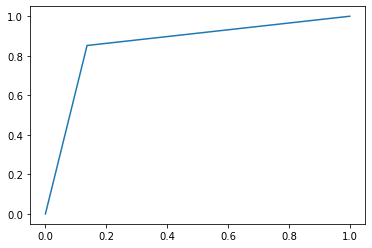

In [78]:
fpr,tpr,_ = metrics.roc_curve(y_test,pred_test_dt)
metrics.roc_auc_score(y_test,pred_test_dt)
plt.plot(fpr,tpr)

# RandomForest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

pred_test_rf=rf.predict(x_test)
acc_test=accuracy_score(pred_test_rf,y_test)

print("acc_test =",acc_test)

acc_test = 0.8839597902097902


In [80]:
 for i in range(2,11):
    rf_cv=cross_val_score(rf,trainx,trainy,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)


Score = 87.19568162944185 at cv = 2
Score = 87.73771755668548 at cv = 3
Score = 88.01969931567689 at cv = 4
Score = 88.18797914057312 at cv = 5
Score = 88.29518094239465 at cv = 6
Score = 88.4741921802382 at cv = 7
Score = 88.35844732073312 at cv = 8
Score = 88.39799421719913 at cv = 9
Score = 88.50705032672246 at cv = 10


In [81]:
rf_cv=cross_val_score(rf,trainx,trainy,cv=4)
rfs=rf_cv.mean()
print("Score =",rfs*100)
print("Accuracy_score =",accuracy_score(pred_test_rf,y_test)*100)

Score = 88.02625602389568
Accuracy_score = 88.39597902097903


# XGB Classifier

In [82]:
from xgboost import XGBClassifier 
import warnings
warnings.filterwarnings("ignore")

In [83]:
xgb=XGBClassifier(use_label_encoder=False)
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
acc_test=accuracy_score(pred_xgb,y_test)

print("acc_test =",acc_test)

[04:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
acc_test = 0.8994755244755245


In [84]:
rf_cv=cross_val_score(xgb,trainx,trainy,cv=10)
rfs=rf_cv.mean()
print("CV score =",rfs*100)
print("Accuracy_score =",accuracy_score(pred_xgb,y_test))


[04:28:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:28:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:28:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:28:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

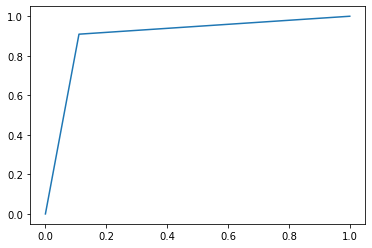

In [85]:
fpr,tpr,_ = metrics.roc_curve(y_test,pred_xgb)
metrics.roc_auc_score(y_test,pred_xgb)
plt.plot(fpr,tpr)

# Hyper parameter tuning 

In [86]:
from sklearn.model_selection import GridSearchCV
param={"booster":["gbtree","gblinear","dart"],"verbosity":[0,1,2,3],"validate_parameters":[True,False],"gamma":[0,5,10,15,20]}
clf = GridSearchCV(XGBClassifier(objective="binary:logistic",eval_metric="error"),param_grid=param)

In [87]:
clf.fit(x_train,y_train)

[04:28:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[04:28:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=6
[04:28:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[04:28:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[04:28:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[04:28:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, eval_metric='error',
                                     gamma=None, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
               

In [88]:
print(clf.best_params_)
print(clf.best_score_)

{'booster': 'gbtree', 'gamma': 0, 'validate_parameters': True, 'verbosity': 0}
0.8989782212126693


In [89]:
xgb=XGBClassifier(use_label_encoder=False,booster="gbtree",gamma=0,validate_parameters=True,verbosity=0)
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
acc_test=accuracy_score(pred_xgb,y_test)

print("acc_test =",acc_test*100)

acc_test = 89.94755244755245


In [90]:
rf_cv=cross_val_score(xgb,trainx,trainy,cv=10)
rfs=rf_cv.mean()
print("CV score =",rfs*100)
print("Accuracy_score =",accuracy_score(pred_xgb,y_test))

CV score = 89.54517129045817
Accuracy_score = 0.8994755244755245


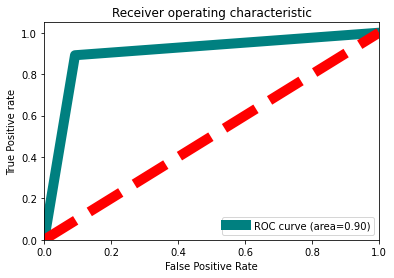

In [91]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds=roc_curve(pred_xgb,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="teal",lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color="red",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

This is the best model with accuracy score = 89.9, cv score=89.5 and ROC curve=90

# Model Saving 

In [92]:
import pickle 
filename= "census.pkl"
pickle.dump(xgb, open(filename,"wb"))

# Conclusion 

In [93]:
a=np.array(y_test)
predicted = np.array(xgb.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index=range(len(a)))
df_com

original  predicted
0            0          0
1            0          0
2            0          1
3            1          0
4            1          1
...        ...        ...
9147         0          1
9148         0          0
9149         1          1
9150         1          0
9151         1          1

[9152 rows x 2 columns]